# Setting

In [1]:
from pf_utils import DataManager, BacktestManager
from pf_widgets import WidgetUniverse, WidgetTransaction

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
METRICS2 = [
    'total_return', 'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'
path_tran = 'transaction'

# Universe

In [3]:
WidgetUniverse

*Define universe and file*

In [4]:
uv_etf  = ['etf', 'etfs_all.csv']
uv_factor  = ['yahoo', 'etfs_factors.csv']
uv_irp  = ['fund', 'funds_irp.csv']
uv_hana = ['fund', 'funds_kebhana.csv']

## ETF

In [5]:
etf = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_etf)))
etf.upload()

907 assets from 2021-01-04 to 2024-10-25 uploaded.
df_prices updated


In [6]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=etf.df_prices.columns
)
etf.download(**kw) if WidgetUniverse.values(0) else None

In [7]:
selected = ['069500', '273130', '148070', '379800', '411060', '284430']
df_etf = etf.df_prices[selected]
assetnames_etf = etf.get_names(tickers=selected)
assetnames_etf

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

In [8]:
etf.get_date_range(df_etf)

,start date,end date
069500,2021-01-04,2024-10-25
273130,2021-01-04,2024-10-25
148070,2021-01-04,2024-10-25
284430,2021-01-04,2024-10-25
379800,2021-04-09,2024-10-25
411060,2021-12-15,2024-10-25


## Factor

In [5]:
factor = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_factor)))
factor.upload()

7 assets from 1993-01-29 to 2024-10-18 uploaded.
df_prices updated


**TODO: implement download for factor**

In [6]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=etf.df_prices.columns
)
factor.download(**kw) if WidgetUniverse.values(0) else None

In [7]:
df_factor = factor.df_prices
tickers = df_factor.columns
assetnames_factor = factor.get_names(tickers)
assetnames_factor

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
factor.get_date_range(df_factor)

,start date,end date
SPY,1993-01-29,2024-10-18
USMV,2011-10-20,2024-10-18
MTUM,2013-04-18,2024-10-18
SIZE,2013-04-18,2024-10-18
VLUE,2013-04-18,2024-10-18
QUAL,2013-07-18,2024-10-18
LRGF,2015-04-30,2024-10-18


## IRP
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8370&fundcode=8380
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537400&childFundGb=2&childFundCd=53740P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537410&childFundGb=2&childFundCd=53741P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [12]:
irp = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_irp))
)
irp.upload()
df = irp.check_days_in_year(252)

Estimating price from "data/funds_irp.csv" ...
Max error of 14 conversions: 0.16 %
14 assets from 2017-07-31 to 2024-08-26 uploaded.
df_prices updated


In [13]:
irp.convert_to_daily(True)

REMINDER: data converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [14]:
df_irp = irp.df_prices
assetnames_irp = irp.get_names()

import pandas as pd
df_an = pd.Series(assetnames_irp).to_frame('name')

In [15]:
irp.get_date_range().sort_values('end date').join(df_an)

,start date,end date,name
K55223BT1450,2017-07-31,2024-07-31,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
K55105BS5067,2017-07-31,2024-07-31,삼성한국형TDF2040증권투자신탁H[주식혼합-재간접형]C-Pe
K55210BU2435,2017-08-31,2024-07-31,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
KR5223AE3357,2017-08-31,2024-07-31,kb퇴직연금배당증권자투자신탁(주식)C-E
K55365BT3694,2017-08-31,2024-07-31,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
K55207BU0715,2017-08-31,2024-07-31,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe
K55203C53681,2018-04-30,2024-07-31,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
K55213C51890,2018-05-31,2024-07-31,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
K55234CJ0997,2019-01-31,2024-07-31,IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re
K55301BU5479,2017-08-14,2024-08-25,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e


In [16]:
irp.performance('sharpe', 'year').join(df_an)

,daily_sharpe,monthly_sharpe,yearly_sharpe,name
K55301BU6139,0.953281,0.901074,0.59158,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
K55301BU5479,0.928838,0.890844,0.589447,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
K55365BT3694,0.640849,0.640538,0.573647,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
K55213C51890,0.749963,0.754216,0.542374,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
K55223BT1450,0.641399,0.641106,0.484719,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
K55210BU2435,0.68767,0.689062,0.478562,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
K55203C53681,0.542176,0.539386,0.475771,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
K55206C96311,0.730614,0.628118,0.452722,키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
K55206C95800,0.778547,0.649921,0.439991,키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
K55207BU0715,0.468617,0.464831,0.417496,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe


## HANA
- https://dis.kofia.or.kr

In [17]:
hana = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_hana))
)
hana.upload()
hana.get_date_range()

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices updated


,start date,end date
KR5101888398,2010-01-29,2024-07-31
KR5370AP9956,2014-04-30,2024-07-31
KR5236AS4826,2014-05-30,2024-07-31
K55306CV9946,2019-10-31,2024-07-31


In [18]:
hana.check_days_in_year(12)

KR5101888398    12.0
KR5236AS4826    12.0
KR5370AP9956    12.0
K55306CV9946    12.0
dtype: float64

In [19]:
hana.convert_to_daily(True)

KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: data converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [20]:
df_hana = hana.df_prices
assetnames_hana = hana.get_names()
assetnames_hana

0) KR5101888398: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
1) KR5236AS4826: 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
2) KR5370AP9956: AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
3) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce

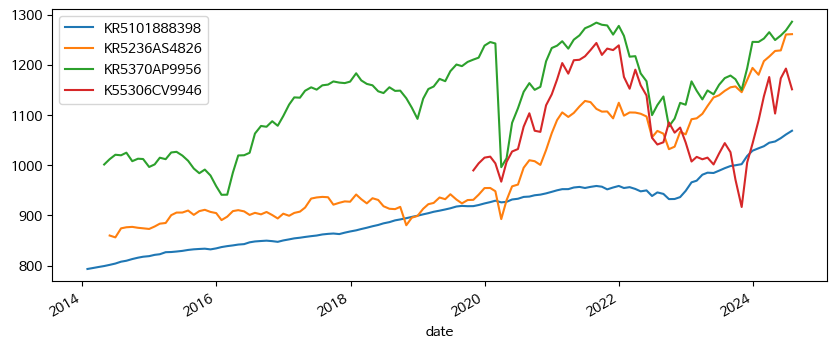

In [21]:
_ = df_hana.loc['2014':].plot(figsize=(10,4))

# Parameter Study

## ETF

In [9]:
kwargs_bm = dict(
    initial_capital = 1e7,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 245,
    asset_names = assetnames_etf
)

### Equal Weight

In [41]:
n_val = 260
lookback = 0
df = df_etf
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-lookback:]

#### Cross-validate

In [43]:
from itertools import product

p_args = dict(
    p_freq = [20,60,125,250]
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'ETF:f{x[0]}', 'freq':x[0]} 
            for x in p_comb]
params[0]

{'name': 'ETF:f20', 'freq': 20}

In [44]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2021-12-15 ~ 2023-09-26
6 assets from 2021-12-15 to 2023-09-26 uploaded.
running self.util_check_days_in_year to check days in a year


In [45]:
kwa_list = params
kwargs_build = dict(
    select='all', reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

4 jobs prepared for cross-validation


In [46]:
bm.cross_validate(n_sample=20)

Cross-validating 4 strategies: ETF:f20, ETF:f60, ETF:f125, ETF:f250


100%|███████████████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.08it/s]


11.8 secs elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [24]:
file = 'param_etf_equal.csv'

*Save param study*

In [48]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

data/param_etf_equal.csv saved
4 param sets with 19 iterations per set


*Load param study*

In [25]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_etf_equal.csv
4 param sets with 19 iterations per set


In [26]:
y = 'cagr'
ref_val = bm.benchmark_stats(y, data=df_cv, name='KODEX200')

Returning cagr of KODEX200 from 2021-12-14 to 2023-09-26


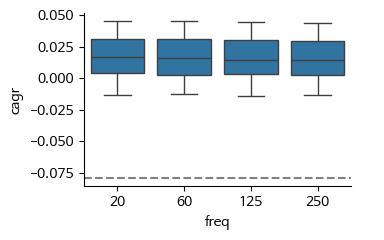

In [27]:
kw = {'x':'freq', 'kind':'box'}
_ = bm.catplot(data=df_cv, y='cagr', ref_val=ref_val, height=2.5, aspect=1.5, **kw)

### All Combinations

In [16]:
df_train = df_etf

#### Cross-validate

In [17]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_lookback = [3,6,12],
    p_lag = [5,10,20],
    p_freq = [20,60,125,250]
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'ETF:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'ETF:equally/lb3/lg5/f20',
 'weigh': 'equally',
 'lookback': 3,
 'lag': 5,
 'freq': 20}

In [18]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2021-12-15 ~ 2024-10-25
6 assets from 2021-12-15 to 2024-10-25 uploaded.
running self.util_check_days_in_year to check days in a year


In [19]:
kwa_list = params
kwargs_build = dict(
    select='all', reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

144 jobs prepared for cross-validation


In [20]:
bm.cross_validate(n_sample=20)

Cross-validating 144 strategies: ETF:equally/lb3/lg5/f20, ETF:equally/lb3/lg5/f60, ... , ETF:invvol/lb12/lg20/f250


100%|███████████████████████████████████████████████████████████████| 19/19 [00:03<00:00,  5.09it/s]


10.3 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [28]:
file = 'param_etf.csv'

*Save param study*

In [ ]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

*Load param study*

In [29]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_etf.csv
144 param sets with 19 iterations per set


In [30]:
y = 'cagr'
ref_val = bm.benchmark_stats(y, data=df_cv, name='KODEX200')

Returning cagr of KODEX200 from 2021-12-14 to 2024-10-25


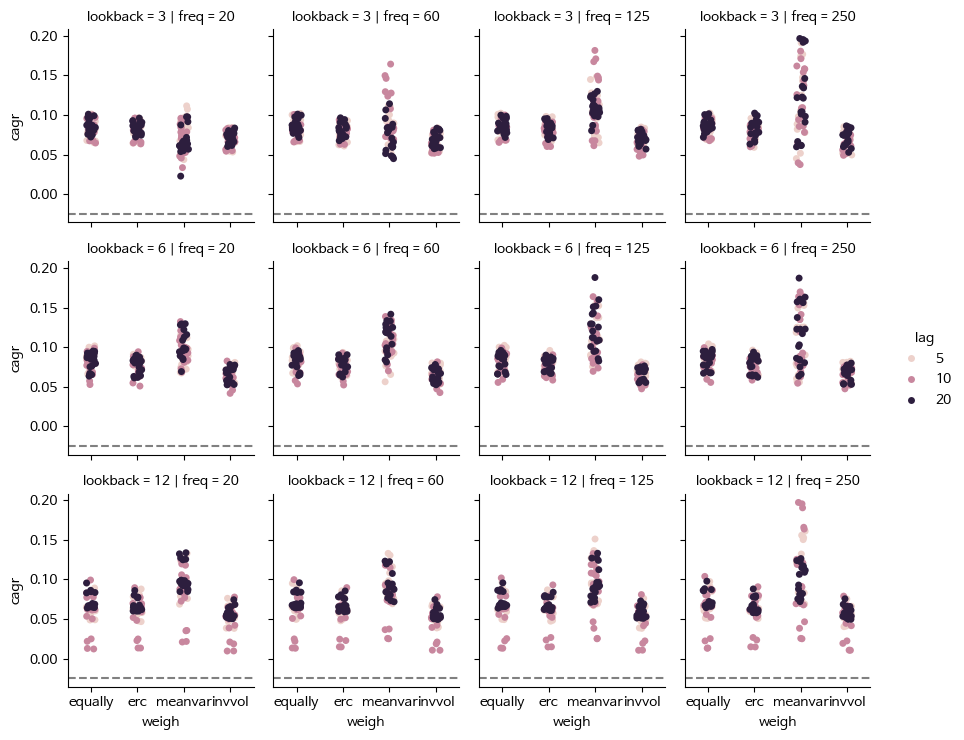

In [31]:
kw = {'row':'lookback', 'col':'freq', 'x':'weigh', 'hue':'lag'}
#kw = {'col':'lookback', 'row':'freq', 'x':'weigh', 'hue':'lag'}

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=2.5, aspect=.9, **kw)

#### Validation

In [32]:
n_val = 260
df_val = df_etf.iloc[-n_val:]

In [33]:
bm = BacktestManager(df_val, **kwargs_bm)

lags = dict(lookback=6, lag=20)
bm.benchmark_ticker(**lags)

6 assets from 2023-09-27 to 2024-10-25 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is KODEX200


In [34]:
# weigh, lookback(M), lag(D), freq(D)
p_comb = [['equally', 6, 20, 125], ['meanvar', 6, 20, 125]]
kwa_list = [{'name':f'ETF:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

Backtesting 3 strategies: KODEX200, ETF:equally/lb6/lg20/f125, ETF:meanvar/lb6/lg20/f125


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.45it/s]

Returning stats


,ETF:meanvar/lb6/lg20/f125,ETF:equally/lb6/lg20/f125,KODEX200
start,2023-09-26,2023-09-26,2023-09-26
end,2024-10-25,2024-10-25,2024-10-25
total_return,0.106379,0.063134,-0.050663
cagr,0.097988,0.058243,-0.046938
calmar,2.074562,1.306615,-0.285257
max_drawdown,-0.047233,-0.044576,-0.164546
avg_drawdown,-0.011426,-0.009972,-0.028975
avg_drawdown_days,16.333333,16.7,17.4
daily_vol,0.056786,0.051258,0.158881
daily_sharpe,1.754144,1.183371,-0.236282


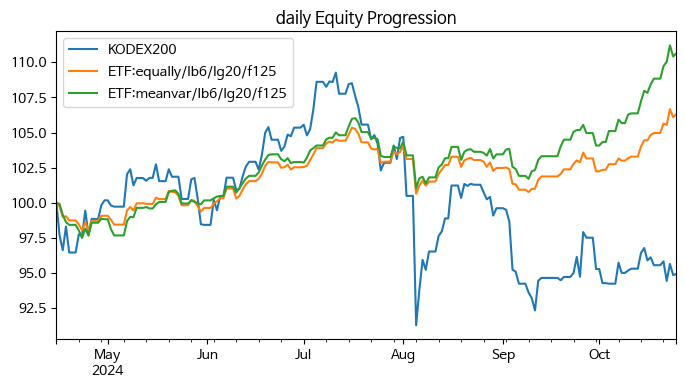

In [35]:
kwargs_build = dict(
    select='all'
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(8,4))

## Factor

In [9]:
len(df_factor)

7988

In [49]:
n_val = 700
lookback = 260
df = df_factor
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-lookback:]

In [50]:
kwargs_bm = dict(
    initial_capital = 1e5, # USD
    commissions = 0,
    align_axis = 0, 
    days_in_year = 252,
    asset_names = assetnames_factor
)

### All Combinations

In [10]:
selected = ['MTUM','QUAL','SIZE','USMV','VLUE']
[assetnames_factor[x] for x in selected]

['iShares MSCI USA Momentum Factor ETF',
 'iShares MSCI USA Quality Factor ETF',
 'iShares MSCI USA Size Factor ETF',
 'iShares MSCI USA Min Vol Factor ETF',
 'iShares MSCI USA Value Factor ETF']

#### Cross-validate

In [13]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_lookback = [3,6,12],
    p_lag = [5,10,20],
    p_freq = [20,60,125,250]
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'FACTOR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'FACTOR:equally/lb3/lg5/f20',
 'weigh': 'equally',
 'lookback': 3,
 'lag': 5,
 'freq': 20}

In [14]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2015-04-30 ~ 2022-01-05
7 assets from 2015-04-30 to 2022-01-05 uploaded.
running self.util_check_days_in_year to check days in a year


In [15]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

144 jobs prepared for cross-validation


In [16]:
kw_batch = dict(size_batch=50, path_batch=path_data)
bm.cross_validate(n_sample=20, **kw_batch)

Cross-validating 144 strategies: FACTOR:equally/lb3/lg5/f20, FACTOR:equally/lb3/lg5/f60, ... , FACTOR:invvol/lb12/lg20/f250


100%|███████████████████████████████████████████████████████████████| 18/18 [00:17<00:00,  1.00it/s]


41.4 mins elapsed, 0.0 secs paused (0.0%)
Temp batch files deleted


In [ ]:
#bm.cross_validate(n_sample=20)

#### Visualize

In [52]:
file = 'param_factor_ishares.csv'

*Save param study*

In [18]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

data/param_factor_ishares.csv saved
144 param sets with 18 iterations per set


*Load param study*

In [53]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_factor_ishares.csv
144 param sets with 18 iterations per set


In [54]:
y = 'cagr'
ref_val = bm.benchmark_stats(y, data=df_cv, name='s&p500')

Returning cagr of s&p500 from 2015-04-28 to 2022-01-04


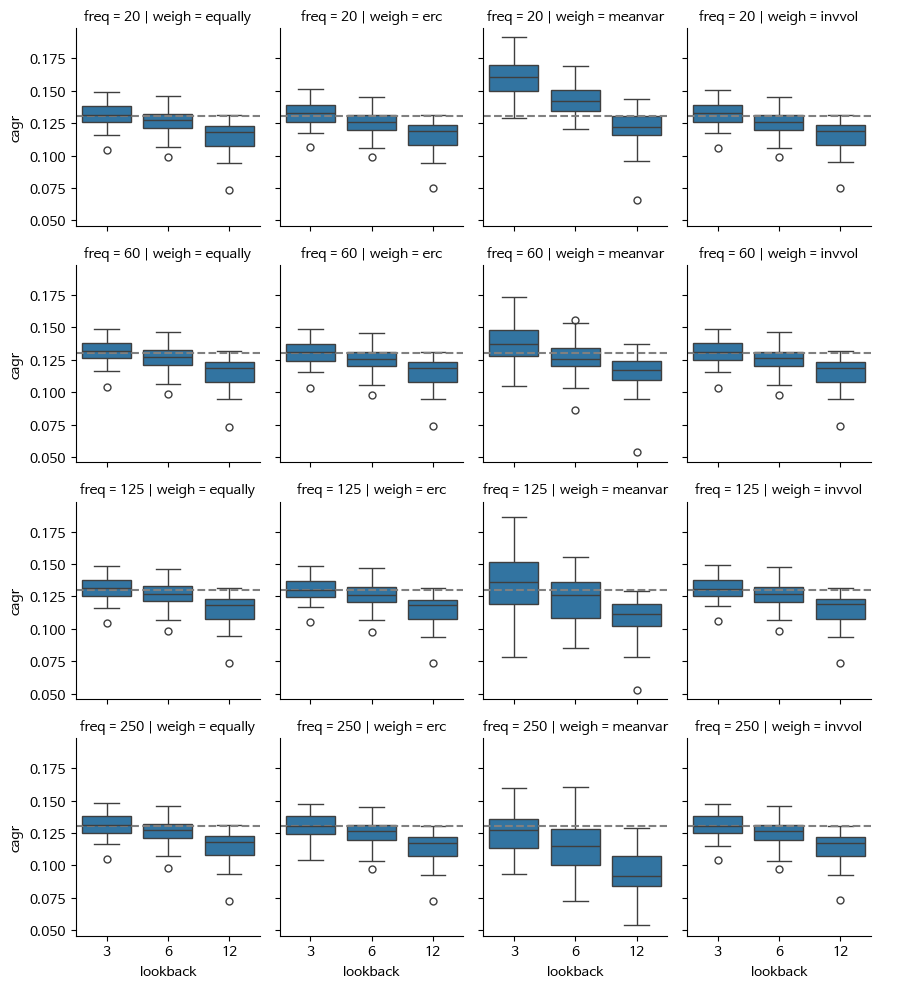

In [58]:
#kw = {'row':'lookback', 'col':'freq', 'x':'weigh', 'hue':'lag'}
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'hue':'lag'}
kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'kind':'box'}
#kw = {'x':'lookback', 'col':'freq', 'row':'weigh', 'kind':'box'}
#kw = {'x':'lookback', 'hue':'weigh', 'col':'freq'}

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=2.5, aspect=.9, **kw)

### Selected

In [59]:
selected = ['MTUM','QUAL','SIZE', 'VLUE']
[assetnames_factor[x] for x in selected]

['iShares MSCI USA Momentum Factor ETF',
 'iShares MSCI USA Quality Factor ETF',
 'iShares MSCI USA Size Factor ETF',
 'iShares MSCI USA Value Factor ETF']

#### Cross-validate

In [61]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar'],
    p_lookback = [3,6,12],
    p_lag = [5],
    p_freq = [20,60,125,250]
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'FACTOR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'FACTOR:equally/lb3/lg5/f20',
 'weigh': 'equally',
 'lookback': 3,
 'lag': 5,
 'freq': 20}

In [62]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2015-04-30 ~ 2022-01-05
7 assets from 2015-04-30 to 2022-01-05 uploaded.
running self.util_check_days_in_year to check days in a year


In [63]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

36 jobs prepared for cross-validation


In [64]:
kw_batch = dict(size_batch=50, path_batch=path_data)
bm.cross_validate(n_sample=20, **kw_batch)

Cross-validating 36 strategies: FACTOR:equally/lb3/lg5/f20, FACTOR:equally/lb3/lg5/f60, ... , FACTOR:meanvar/lb12/lg5/f250


100%|███████████████████████████████████████████████████████████████| 19/19 [00:17<00:00,  1.08it/s]


11.4 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [65]:
file = 'param_factor_ishares_s1.csv'

*Save param study*

In [66]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

data/param_factor_ishares_s1.csv saved
36 param sets with 19 iterations per set


*Load param study*

In [67]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_factor_ishares_s1.csv
36 param sets with 19 iterations per set


In [68]:
y = 'cagr'
ref_val = bm.benchmark_stats(y, data=df_cv, name='s&p500')

Returning cagr of s&p500 from 2015-04-28 to 2022-01-04


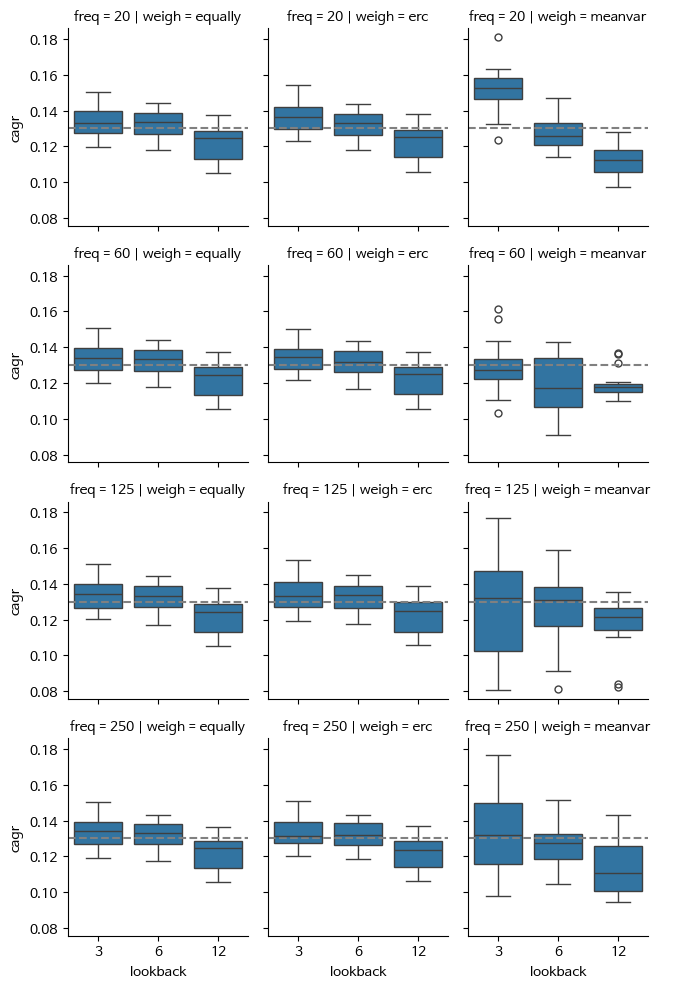

In [69]:
#kw = {'row':'lookback', 'col':'freq', 'x':'weigh', 'hue':'lag'}
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'hue':'lag'}
kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'kind':'box'}
#kw = {'x':'lookback', 'col':'freq', 'row':'weigh', 'kind':'box'}

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=2.5, aspect=.9, **kw)

#### Validation

In [70]:
df = df_val
#df = df_factor
bm = BacktestManager(df, **kwargs_bm)

lags = dict(lookback=3, lag=5)
bm.benchmark_ticker(name='s&p500', **lags)

7 assets from 2020-12-24 to 2024-10-18 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is s&p500


In [71]:
# weigh, lookback(M), lag(D), freq(D)
p_comb = [['meanvar', 3, 5, 20], ['equally', 3, 5, 20], ['equally', 3, 5, 250]]
kwa_list = [{'name':f'FACTOR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

In [72]:
selected

['MTUM', 'QUAL', 'SIZE', 'VLUE']

Backtesting 4 strategies: s&p500, FACTOR:meanvar/lb3/lg5/f20, FACTOR:equally/lb3/lg5/f20, FACTOR:equally/lb3/lg5/f250


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.22it/s]

Returning stats


,s&p500,FACTOR:equally/lb3/lg5/f20,FACTOR:equally/lb3/lg5/f250,FACTOR:meanvar/lb3/lg5/f20
start,2020-12-23,2020-12-23,2020-12-23,2020-12-23
end,2024-10-17,2024-10-17,2024-10-17,2024-10-17
total_return,0.467595,0.371233,0.366366,0.19167
cagr,0.105741,0.086239,0.085227,0.047018
calmar,0.418399,0.334725,0.329523,0.142989
max_drawdown,-0.252728,-0.257641,-0.258638,-0.328822
avg_drawdown,-0.016806,-0.021593,-0.020935,-0.025993
avg_drawdown_days,22.352941,27.232558,28.585366,41.931034
daily_vol,0.160363,0.161938,0.16201,0.163264
daily_sharpe,0.708921,0.593354,0.587393,0.363896


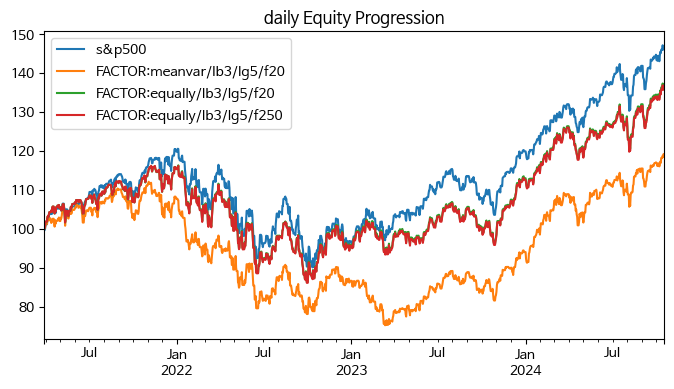

In [73]:
kwargs_build = dict(
    select=selected
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(8,4))

## IRP

In [22]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_irp
)

lags = dict(lookback=12, lag=5)

### My portfolio

In [306]:
choice_mp = ['K55301BU6139', 'K55206C95800']
irp.get_names(choice_mp)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

In [307]:
bm = BacktestManager(df_irp, **kwargs_bm)

period reset: 2019-01-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [308]:
bm.benchmark_ticker()

Benchmark is KODEX200


In [309]:
choice = choice_mp

kwargs_build = dict(
    # equal weights for choice, zero weights for the rest of the assets
    weigh='Specified', weights=choice,
    select ='all'
)
bm.build(name='MP:Quarterly', freq='Q', **kwargs_build)
bm.build(name='MP:Yearly', freq='Y', **kwargs_build)

In [310]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 3 strategies: KODEX200, MP:Quarterly, MP:Yearly


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.82it/s]

Returning stats


,MP:Yearly,MP:Quarterly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31
total_return,0.5097,0.509769,0.487812
cagr,0.077764,0.077773,0.074906
monthly_vol,0.103181,0.103205,0.19921
monthly_sharpe,0.779885,0.779812,0.461712
max_drawdown,-0.215629,-0.21565,-0.346184
avg_drawdown,-0.014143,-0.014135,-0.047368
avg_drawdown_days,28.912281,28.912281,68.357143


### Weight

In [311]:
bm.benchmark_ticker(name='LAG:KODEX200', **lags)

Benchmark is LAG:KODEX200


In [312]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

choice = choice_mp
bm.build(name='LAG:MP', weigh='Specified', weights=choice, **kwargs_build)

In [313]:
bm.build(name='LAG:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='LAG:ERC', weigh='ERC', **kwargs_build)
bm.build(name='LAG:InvVol', weigh='InvVol', **kwargs_build)
bm.build(name='LAG:MeanVar', weigh='MeanVar', **kwargs_build)

In [314]:
bm.portfolios

0) KODEX200
1) MP:Quarterly
2) MP:Yearly
3) LAG:KODEX200
4) LAG:MP
5) LAG:Eqaully
6) LAG:ERC
7) LAG:InvVol
8) LAG:MeanVar

In [315]:
pf_list = list(bm.portfolios.keys())[3:]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 6 strategies: LAG:KODEX200, LAG:MP, ... , LAG:MeanVar


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.60it/s]

Returning stats


,LAG:MP,LAG:Eqaully,LAG:ERC,LAG:InvVol,LAG:KODEX200,LAG:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.320584,0.355465,0.310493,0.301408,0.435671,0.218928
cagr,0.051856,0.056853,0.05039,0.049062,0.067957,0.036648
monthly_vol,0.099719,0.119832,0.105256,0.104687,0.189682,0.10127
monthly_sharpe,0.558104,0.522481,0.520792,0.510908,0.440919,0.406259
max_drawdown,-0.215628,-0.204365,-0.185794,-0.183714,-0.342786,-0.189489
avg_drawdown,-0.018684,-0.012366,-0.011598,-0.011269,-0.052,-0.014114
avg_drawdown_days,39.333333,35.45,29.744681,32.627907,74.619048,41.828571


In [316]:
kwb = {**kwargs_build, 'freq':'Q'}

bm.build(name='LAG:Quarterly', weigh='equally', **kwb)

In [317]:
pf_list = list(bm.portfolios.keys())[3:]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 7 strategies: LAG:KODEX200, LAG:MP, ... , LAG:Quarterly


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.57it/s]

Returning stats


,LAG:MP,LAG:Eqaully,LAG:Quarterly,LAG:ERC,LAG:InvVol,LAG:KODEX200,LAG:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.320584,0.355465,0.354231,0.310493,0.301408,0.435671,0.218928
cagr,0.051856,0.056853,0.056678,0.05039,0.049062,0.067957,0.036648
monthly_vol,0.099719,0.119832,0.11947,0.105256,0.104687,0.189682,0.10127
monthly_sharpe,0.558104,0.522481,0.522332,0.520792,0.510908,0.440919,0.406259
max_drawdown,-0.215628,-0.204365,-0.204063,-0.185794,-0.183714,-0.342786,-0.189489
avg_drawdown,-0.018684,-0.012366,-0.012063,-0.011598,-0.011269,-0.052,-0.014114
avg_drawdown_days,39.333333,35.45,34.463415,29.744681,32.627907,74.619048,41.828571


### Select

In [318]:
n = 4
choice = irp.performance('sharpe', 'year').index[:n].to_list()
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)

In [319]:
kwa_list = [{'name':f'SHP:Y{i}', 'weights':choice[:i]} for i in range(1,n+1)]

kwargs_build = dict(
    freq = 'Y', select = 'all', weigh='Specified'
)

bm.build_batch(*kwa_list, **kwargs_build)

In [320]:
bm.portfolios

0) KODEX200
1) MP:Quarterly
2) MP:Yearly
3) LAG:KODEX200
4) LAG:MP
5) LAG:Eqaully
6) LAG:ERC
7) LAG:InvVol
8) LAG:MeanVar
9) LAG:Quarterly
10) SHP:Y1
11) SHP:Y2
12) SHP:Y3
13) SHP:Y4

In [321]:
pf_list = [0, 2, 10, 11, 12, 13]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 6 strategies: KODEX200, MP:Yearly, ... , SHP:Y4


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.50it/s]

Returning stats


,SHP:Y1,SHP:Y2,SHP:Y4,SHP:Y3,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.618317,0.666064,0.682601,0.5097,0.487812
cagr,0.087514,0.091463,0.097249,0.099221,0.077764,0.074906
monthly_vol,0.099616,0.104922,0.122943,0.126855,0.103181,0.19921
monthly_sharpe,0.894809,0.889493,0.819295,0.811894,0.779885,0.461712
max_drawdown,-0.215077,-0.22212,-0.184672,-0.203328,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.012311,-0.009163,-0.010896,-0.014143,-0.047368
avg_drawdown_days,20.853659,20.987805,22.973333,24.942857,28.912281,68.357143


In [322]:
n = 4
choice = irp.performance('sharpe', 'month').index[:n].to_list()
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
2) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)

In [323]:
kwa_list = [{'name':f'SHP:M{i}', 'weights':choice[:i]} for i in range(1,n+1)]

bm.build_batch(*kwa_list, **kwargs_build)

In [324]:
pf_list = [0, 2, 10, 14, 15, 16, 17]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 7 strategies: KODEX200, MP:Yearly, ... , SHP:M4


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.92it/s]

Returning stats


,SHP:Y1,SHP:M1,SHP:M2,SHP:M3,SHP:M4,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.586372,0.618317,0.496902,0.524563,0.5097,0.487812
cagr,0.087514,0.087514,0.091463,0.076097,0.079685,0.077764,0.074906
monthly_vol,0.099616,0.099616,0.104922,0.089114,0.094304,0.103181,0.19921
monthly_sharpe,0.894809,0.894809,0.889493,0.869994,0.862908,0.779885,0.461712
max_drawdown,-0.215077,-0.215077,-0.22212,-0.191431,-0.157305,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.0116,-0.012311,-0.010156,-0.008272,-0.014143,-0.047368
avg_drawdown_days,20.853659,20.853659,20.987805,20.890244,20.26506,28.912281,68.357143


In [325]:
choice = irp.performance('sharpe').idxmax().unique().tolist()
irp.get_names(choice)

0) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
1) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e

In [326]:
bm.build(name='SHP:Y1M1', weights=choice, **kwargs_build)

In [327]:
pf_list = [0, 2, 10, 18]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 4 strategies: KODEX200, MP:Yearly, SHP:Y1, SHP:Y1M1


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.18it/s]

Returning stats


,SHP:Y1,SHP:Y1M1,MP:Yearly,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.423583,0.5097,0.487812
cagr,0.087514,0.066316,0.077764,0.074906
monthly_vol,0.099616,0.078857,0.103181,0.19921
monthly_sharpe,0.894809,0.85584,0.779885,0.461712
max_drawdown,-0.215077,-0.172359,-0.215629,-0.346184
avg_drawdown,-0.0116,-0.008916,-0.014143,-0.047368
avg_drawdown_days,20.853659,21.481013,28.912281,68.357143


### Candis

In [328]:
choice = choice_mp + ['K55365BT3694', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
4) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [329]:
bm.build(name='CAN1', weights=choice, **kwargs_build)

In [330]:
pf_list = [0, 2, 10, 19]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 4 strategies: KODEX200, MP:Yearly, SHP:Y1, CAN1


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.28it/s]

Returning stats


,SHP:Y1,MP:Yearly,CAN1,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.5097,0.588888,0.487812
cagr,0.087514,0.077764,0.087828,0.074906
monthly_vol,0.099616,0.103181,0.128152,0.19921
monthly_sharpe,0.894809,0.779885,0.722651,0.461712
max_drawdown,-0.215077,-0.215629,-0.213511,-0.346184
avg_drawdown,-0.0116,-0.014143,-0.011399,-0.047368
avg_drawdown_days,20.853659,28.912281,35.333333,68.357143


In [331]:
choice = choice_mp + ['K55365BT3694']
bm.build(name='CAN2', weights=choice, **kwargs_build)

In [332]:
pf_list = [0, 2, 10, 19, 20]
bm.run(pf_list, plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 5 strategies: KODEX200, MP:Yearly, SHP:Y1, CAN1, CAN2


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.31it/s]

Returning stats


,SHP:Y1,MP:Yearly,CAN2,CAN1,KODEX200
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.586372,0.5097,0.609242,0.588888,0.487812
cagr,0.087514,0.077764,0.090348,0.087828,0.074906
monthly_vol,0.099616,0.103181,0.126804,0.128152,0.19921
monthly_sharpe,0.894809,0.779885,0.748086,0.722651,0.461712
max_drawdown,-0.215077,-0.215629,-0.208847,-0.213511,-0.346184
avg_drawdown,-0.0116,-0.014143,-0.012401,-0.011399,-0.047368
avg_drawdown_days,20.853659,28.912281,31.339623,35.333333,68.357143


#### Weight

In [362]:
choice = choice_mp + ['K55365BT3694', 'K55213C51890', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
3) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
4) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
5) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [363]:
df = df_irp[choice]
bm = BacktestManager(df, **kwargs_bm)

period reset: 2019-01-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [364]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [365]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='CAN3:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='CAN3:ERC', weigh='ERC', **kwargs_build)
bm.build(name='CAN3:InvVol', weigh='InvVol', **kwargs_build)
bm.build(name='CAN3:MeanVar', weigh='MeanVar', **kwargs_build)

In [366]:
bm.build(name='MP', weigh='Specified', weights=choice_mp, **kwargs_build)

In [367]:
choice = irp.performance('sharpe', 'year').index
bm.build(name=f'SHP:Y1', weigh='Specified', weights=choice[0], **kwargs_build)

In [368]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 7 strategies: KODEX200, CAN3:Eqaully, ... , SHP:Y1


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.84it/s]

Returning stats


,SHP:Y1,CAN3:Eqaully,CAN3:ERC,MP,CAN3:InvVol,KODEX200,CAN3:MeanVar
start,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30,2019-01-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.375277,0.410699,0.36222,0.320584,0.35347,0.435671,0.239453
cagr,0.059645,0.064555,0.057809,0.051856,0.05657,0.067957,0.0398
monthly_vol,0.096018,0.121237,0.109432,0.099719,0.110411,0.189682,0.103302
monthly_sharpe,0.652645,0.577498,0.569288,0.558104,0.554492,0.440919,0.429649
max_drawdown,-0.21507,-0.196979,-0.183427,-0.215628,-0.181566,-0.342786,-0.195187
avg_drawdown,-0.014249,-0.012469,-0.012531,-0.018684,-0.011687,-0.052,-0.014138
avg_drawdown_days,25.714286,36.205128,34.121951,39.333333,32.55814,74.619048,41.542857


#### Value1

In [53]:
choice = ['K55365BT3694', 'K55203C53681', 'K55234CJ0997']
irp.get_names(choice)

0) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
1) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
2) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re

In [54]:
df_v = df_pf['K200:Momentum'].to_frame().join(df_irp[choice], how='outer')
bm = BacktestManager(df_v, **kwargs_bm)
bm.df_assets.head()

period reset: 2022-01-25 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


,KOSPI:Momentum,K55365BT3694,K55203C53681,K55234CJ0997
2022-01-25,100.000,1012.039352,1338.109236,1390.010967
2022-01-26,99.780,1012.039352,1338.109236,1390.010967
2022-01-27,96.064,1012.039352,1338.109236,1390.010967
2022-01-28,96.318,897.421767,1203.518615,1360.231095
2022-01-29,96.318,897.421767,1203.518615,1360.231095


In [55]:
bm.benchmark_ticker()

Benchmark is KODEX200


In [56]:
ew = lambda *l: [x for i,x in enumerate(bm.df_assets.columns) if i in l]

kwargs_build = dict(
    select = 'all', weigh='Specified'
)

hy = round(bm.days_in_year/2)
kwa_list = [
    {'name':f'VAL1:{f}{i}', 'freq':f if f != 'HY' else hy, 'weights':ew(0, i)} 
    for i in range(1,4) for f in ['Y', 'HY', 'Q', 'M']
]

bm.build_batch(*kwa_list, **kwargs_build)
bm.build(name='VAL:Momentum', freq='Once', weights=ew(0), **kwargs_build)

In [57]:
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 14 strategies: KODEX200, VAL1:Y1, ... , VAL:Momentum


100%|███████████████████████████████████████████████████████████████| 14/14 [00:03<00:00,  3.77it/s]

Returning stats


,VAL1:M1,VAL:Momentum,VAL1:Q1,VAL1:HY1,VAL1:M2,VAL1:M3,VAL1:Q2,VAL1:HY2,VAL1:Q3,VAL1:HY3,VAL1:Y1,VAL1:Y2,VAL1:Y3,KODEX200
start,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,1.816207,5.202315,1.948988,2.275473,1.743892,1.663188,1.876178,2.216583,1.817629,2.177257,1.994999,1.929399,1.892298,0.105647
cagr,0.509093,1.065356,0.53698,0.602478,0.493571,0.475954,0.521784,0.590964,0.509396,0.583205,0.546466,0.532914,0.525168,0.040723
monthly_vol,0.299109,0.543153,0.316649,0.355989,0.304777,0.283343,0.322797,0.361163,0.305477,0.350819,0.35985,0.362872,0.350884,0.201805
monthly_sharpe,1.654736,1.642873,1.637335,1.607304,1.583744,1.576551,1.569953,1.559326,1.556125,1.529182,1.493624,1.450505,1.421477,0.318938
max_drawdown,-0.174774,-0.262851,-0.177392,-0.176973,-0.165838,-0.145682,-0.16868,-0.16879,-0.16052,-0.17093,-0.192837,-0.186211,-0.197747,-0.235302
avg_drawdown,-0.038191,-0.061554,-0.038592,-0.040179,-0.039565,-0.033912,-0.042578,-0.042454,-0.03392,-0.037747,-0.049821,-0.047745,-0.047972,-0.035817
avg_drawdown_days,21.189189,17.088889,22.571429,21.944444,22.055556,19.7,22.628571,21.27027,21.297297,20.205128,21.378378,21.916667,20.410256,51.588235


#### Value2

In [63]:
choice = ['K55365BT3694']
irp.get_names(choice)

0) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2

In [64]:
df_v = df_pf['K200:Momentum'].to_frame().join(df_irp[choice], how='outer')
bm = BacktestManager(df_v, **kwargs_bm)
bm.df_assets.head()

period reset: 2022-01-25 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


,KOSPI:Momentum,K55365BT3694
2022-01-25,100.000,1012.039352
2022-01-26,99.780,1012.039352
2022-01-27,96.064,1012.039352
2022-01-28,96.318,897.421767
2022-01-29,96.318,897.421767


In [65]:
kwargs_build = dict(
    select = 'all', **lags
)

kwa_list = [
    {'name':f'VAL2:{f}', 'freq':f if f != 'HY' else hy} for f in ['Y', 'HY', 'Q', 'M']
]

bm.build_batch(*kwa_list, weigh='ERC', **kwargs_build)
bm.build(name='VAL2:Momentum', freq='Once', weights=ew(0), weigh='Specified', **kwargs_build)
bm.run(plot=False, stats_sort_by='monthly_sharpe', metrics=METRICS2)

Backtesting 5 strategies: VAL2:Y, VAL2:HY, VAL2:Q, VAL2:M, VAL2:Momentum


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.33it/s]


Returning stats


,VAL2:Q,VAL2:M,VAL2:HY,VAL2:Momentum,VAL2:Y
start,2022-01-24,2022-01-24,2022-01-24,2022-01-24,2022-01-24
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,1.367166,1.274549,1.529266,4.653043,1.477626
cagr,0.408428,0.386262,0.445997,0.990624,0.43419
monthly_vol,0.191406,0.186329,0.233586,0.515736,0.261045
monthly_sharpe,1.914088,1.873641,1.717047,1.592483,1.527195
max_drawdown,-0.123468,-0.120783,-0.146581,-0.26285,-0.170256
avg_drawdown,-0.0216,-0.018723,-0.025313,-0.055505,-0.034704
avg_drawdown_days,12.294118,11.527778,13.3125,12.228571,12.969697


In [49]:
df = bm.get_historical()
df_pf = df_pf.join(df['TDF2:Eqaully'])

## HANA

In [10]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_hana
)
bm = BacktestManager(df_hana, **kwargs_bm)

period reset: 2019-10-31 ~ 2024-07-31
running self.util_check_days_in_year to check days in a year


In [11]:
lags = dict(lookback=12, lag=5)

In [12]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [13]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='HANA:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='HANA:ERC', weigh='ERC', **kwargs_build)
bm.build(name='HANA:InvVol', weigh='InvVol', **kwargs_build)

In [14]:
kwargs_build = dict(
    weigh='InvVol',  select = 'all',  **lags
)

bm.build(name='HANA:InvVol(Q)', freq = 'Q', **kwargs_build)
bm.build(name='HANA:InvVol(M)', freq = 'M', **kwargs_build)

Backtesting 6 strategies: KODEX200, HANA:Eqaully, ... , HANA:InvVol(M)


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.16it/s]

Returning stats


,HANA:InvVol,HANA:InvVol(M),HANA:InvVol(Q),HANA:ERC,HANA:Eqaully,KODEX200
start,2019-10-30,2019-10-30,2019-10-30,2019-10-30,2019-10-30,2019-10-30
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.153301,0.128839,0.131496,0.180167,0.155502,0.317262
cagr,0.030463,0.025826,0.026333,0.035468,0.030877,0.05969
calmar,0.531545,0.397336,0.406434,0.434394,0.317349,0.174126
max_drawdown,-0.057311,-0.064998,-0.064791,-0.081649,-0.097296,-0.342796
avg_drawdown,-0.015045,-0.009759,-0.013248,-0.024826,-0.028437,-0.039924
avg_drawdown_days,128.166667,112.125,146.166667,172.0,177.8,87.133333
daily_vol,0.032006,0.032026,0.032686,0.046101,0.049326,0.153677
daily_sharpe,0.973311,0.828929,0.828294,0.7949,0.654115,0.46194


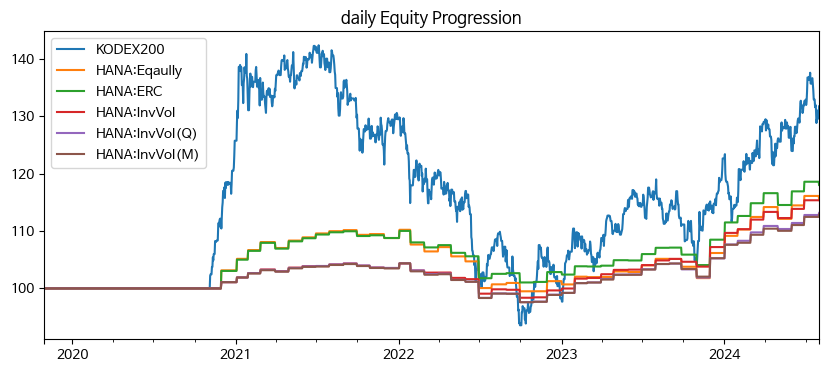

In [15]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [ ]:
df = bm.get_historical()
df_pf = df_pf.join(df['HANA:InvVol'])

## Summary

# testing

In [17]:
from itertools import product

p_args = dict(
    p_w = ['equally'],
    p_lookback = [3,6,12],
    p_lag = [5],
    p_freq = [125]
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'FACTOR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'FACTOR:equally/lb3/lg5/f125',
 'weigh': 'equally',
 'lookback': 3,
 'lag': 5,
 'freq': 125}

In [18]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2013-07-18 ~ 2022-01-05
5 assets from 2013-07-18 to 2022-01-05 uploaded.
running self.util_check_days_in_year to check days in a year


In [19]:
kwa_list = params
kwargs_build = dict(
    select='all', reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

3 jobs prepared for cross-validation


In [22]:
kw_batch = dict(size_batch=2, path_batch=path_data, delete_batch=False)
bm.cross_validate(n_sample=2, **kw_batch)

Cross-validating 3 strategies: FACTOR:equally/lb3/lg5/f125, FACTOR:equally/lb6/lg5/f125, FACTOR:equally/lb12/lg5/f125


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]

3.7 secs elapsed, 0.0 secs paused (0.0%)


In [23]:
df_cv = bm.get_cat_data(params)

3 param sets with 19 iterations per set


*Load param study*

In [24]:
y = 'cagr'
ref_val = bm.benchmark_stats(y, data=df_cv, name='s&p500')

Returning cagr of s&p500 from 2013-07-16 to 2022-01-04


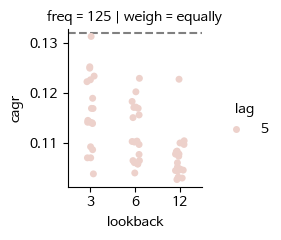

In [26]:
#kw = {'row':'lookback', 'col':'freq', 'x':'weigh', 'hue':'lag'}
kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'hue':'lag'}
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'kind':'box'}

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=2.5, aspect=.9, **kw)

In [34]:
a = dict(a=1)
a is dict()

False

In [35]:
len(a)

1

In [38]:
def test(a):
    if a > 0:
        return a
    else:
        raise NotImplementedError

test(-1)

NotImplementedError: 

In [ ]:
#bm.cross_validate(n_sample=20)

In [39]:
def _get_tickers_kospi200(self, ticker='KRX/INDEX/STOCK/1028', 
                          col_asset='Code', col_name='Name'):
    tickers = fdr.SnapDataReader(ticker)
    return tickers.set_index(col_asset)[col_name].to_dict()

In [ ]:
def _get_tickers_yahoo(self, ticker='KRX/INDEX/STOCK/1028', 
                          col_asset='Code', col_name='Name'):
    tickers = fdr.SnapDataReader(ticker)
    return tickers.set_index(col_asset)[col_name].to_dict()

In [50]:
import yfinance as yf


def _get_tickers_yahoo(self, tickers):
    if isinstance(tickers, str):
        tickers = [tickers]
    yft = yf.Tickers(' '.join(tickers))
    return {x:yft.tickers[x].info['shortName'] for x in tickers}

tickers = ['LRGF', 'MTUM', 'QUAL', 'SIZE', 'SPY', 'USMV', 'VLUE']
_get_tickers_yahoo(1, tickers)

{'LRGF': 'iShares U.S. Equity Factor ETF',
 'MTUM': 'iShares MSCI USA Momentum Facto',
 'QUAL': 'iShares MSCI USA Quality Factor',
 'SIZE': 'iShares MSCI USA Size Factor ET',
 'SPY': 'SPDR S&P 500',
 'USMV': 'iShares MSCI USA Min Vol Factor',
 'VLUE': 'iShares MSCI USA Value Factor E'}

In [44]:
test2 = lambda **kw: test(1, **kw)
test2

<function __main__.<lambda>(**kw)>

In [46]:
tickers = df_factor.columns.to_list()

['LRGF', 'MTUM', 'QUAL', 'SIZE', 'SPY', 'USMV', 'VLUE']